In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [3]:
cd /content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master

/content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master


In [4]:
pip install -r requirements.txt

     |████████████████████████████████| 163kB 5.3MB/s 
     |████████████████████████████████| 440kB 6.8MB/s 
     |████████████████████████████████| 716kB 7.7MB/s 
     |████████████████████████████████| 3.4MB 12.6MB/s 
     |████████████████████████████████| 286kB 35.2MB/s 
     |████████████████████████████████| 952kB 20.8MB/s 
     |████████████████████████████████| 1.6MB 45.8MB/s 
     |████████████████████████████████| 16.8MB 352kB/s 
     |████████████████████████████████| 12.8MB 204kB/s 
ERROR: Could not find a version that satisfies the requirement mkl-fft==1.0.10 (from -r requirements.txt (line 19)) (from versions: 1.0.0.17, 1.0.2, 1.0.6)
ERROR: No matching distribution found for mkl-fft==1.0.10 (from -r requirements.txt (line 19))


In [5]:
pip install mkl-fft

     |████████████████████████████████| 235kB 4.0MB/s 
     |████████████████████████████████| 6.1MB 17.2MB/s 
     |████████████████████████████████| 399kB 27.1MB/s 
     |████████████████████████████████| 11.2MB 17.2MB/s 
     |████████████████████████████████| 235kB 51.0MB/s 
     |████████████████████████████████| 901kB 31.2MB/s 
ERROR: icc-rt 2020.0.133 has requirement intel-openmp==2020.*, but you'll have intel-openmp 2021.1.2 which is incompatible.


In [6]:
import subprocess

In [7]:
from time import time

In [8]:
%cd /content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/code

/content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/code


In [ ]:
def synthesize_text(text):
    """Synthesizes speech from the input string of text."""
    from google.cloud import texttospeech

    client = texttospeech.TextToSpeechClient()

    input_text = texttospeech.SynthesisInput(text=text)

    # Note: the voice can also be specified by name.
    # Names of voices can be retrieved with client.list_voices().
    voice = texttospeech.VoiceSelectionParams(
        language_code="en-US",
        name="en-US-Standard-I",
        ssml_gender=texttospeech.SsmlVoiceGender.MALE,
    )

    audio_config = texttospeech.AudioConfig(
        speaking_rate=0.8,
        audio_encoding=texttospeech.AudioEncoding.MP3,
    )

    response = client.synthesize_speech(
        request={"input": input_text, "voice": voice, "audio_config": audio_config}
    )

    # The response's audio_content is binary.
    with open("output.mp3", "wb") as out:
        out.write(response.audio_content)
        print('Audio content written to file "output.mp3"')

In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/gdrive/MyDrive/Colab_Notebooks/text-to-speech-ecdff9b09bd6.json' 
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/gdrive/MyDrive/Colab_Notebooks/text-to-speech-ecdff9b09bd6.json


In [ ]:
pip install --upgrade google-cloud-texttospeech

Requirement already up-to-date: google-cloud-texttospeech in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [ ]:
#if the library cannot be installed. please restart the runtime and try again
text = "Google Cloud Text-to-Speech enables developers to synthesize natural-sounding speech with 100+ voices"
mp3file = synthesize_text(text)

Audio content written to file "output.mp3"


In [ ]:
!ffmpeg -y -i output.mp3 output.flac

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
cp output.flac ../gTTS_sample/

In [9]:
!pip install --upgrade numba
!pip install --upgrade librosa

     |████████████████████████████████| 3.2MB 4.1MB/s 
     |████████████████████████████████| 25.3MB 1.7MB/s 
  Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
Requirement already up-to-date: librosa in /usr/local/lib/python3.6/dist-packages (0.8.0)


In [ ]:
!ffmpeg -y -i /content/gdrive/MyDrive/Colab_Notebooks/noise_resilient_3dtface-master/gTTS_sample/output1.wav /content/gdrive/MyDrive/Colab_Notebooks/noise_resilient_3dtface-master/gTTS_sample/output1.flac

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
#voice from gTTS
t0 = time()
!python generate.py -i ../gTTS_sample/ -m ../pre_trained/1D_CNN.pt -o ../results/1D_CNN/
t1 = time()

../gTTS_sample/output1.flac
  0% 0/285 [00:00<?, ?it/s]/content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/code/plot_face.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'datalim')
  1% 2/285 [00:00<00:18, 15.60it/s]/content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/code/plot_face.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_asp

In [ ]:
#gTTS_version
from IPython.display import HTML
from base64 import b64encode
print("Generation time : %fs" %(t1-t0))
mp4 = open('/content/gdrive/MyDrive/Colab_Notebooks/noise_resilient_3dtface-master/results/1D_CNN/output1_painted_.mp4','rb').read()
#mp4 = open('/content/gdrive/MyDrive/Colab_Notebooks/noise_resilient_3dtface-master/results/1D_CNN_TC/output_painted_.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#t2= time()

#print("Generation time: %fs" %(t1-t0))
#print("Display result time: %fs" %(t2-t1))
#print("Total time: %fs" %(t2-t0))

Generation time : 21.740062s


In [12]:
t0 = time()
!python generate.py -i ../speech_samples/ -m ../pre_trained/1D_CNN.pt -o ../results/1D_CNN/
t1 = time()

../speech_samples/test1.flac
  0% 1/375 [00:00<00:41,  8.93it/s]/content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/code/plot_face.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'datalim')
/content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/code/plot_face.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'datalim')
/c

In [13]:
from IPython.display import HTML
from base64 import b64encode
print("Generation time : %fs" %(t1-t0))
mp4 = open('/content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/results/1D_CNN/test1_painted_.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)
#t2= time()

#print("Generation time: %fs" %(t1-t0))
#print("Display result time: %fs" %(t2-t1))
#print("Total time: %fs" %(t2-t0))

Generation time : 31.644881s


In [ ]:
#gTTS_version
from IPython.display import HTML
from base64 import b64encode
print("Generation time : %fs" %(t1-t0))
mp4 = open('/content/gdrive/MyDrive/Colab_Notebooks/noise_resilient_3dtface-master/results/1D_CNN/output_painted_.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#t2= time()

#print("Generation time: %fs" %(t1-t0))
#print("Display result time: %fs" %(t2-t1))
#print("Total time: %fs" %(t2-t0))

[0.08779375, 0.14132099, 0.11434353, 0.07627904, -0.07129127, -0.11075098, -0.12912463, -0.08335256]
[0.07029338 0.08528457 0.14622328 0.17537315 0.18079597 0.15513771
 0.09189249 0.07572314]


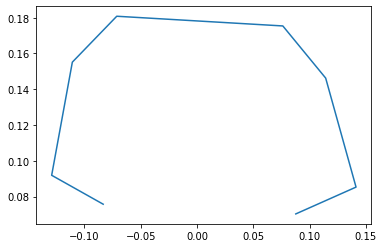

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=[-0.12912463,-0.12768885,-0.12437947,-0.11768372,-0.1091271,-0.09284852
,-0.06712572,-0.03805102,-0.00316283,-0.00273528,-0.01581563,-0.03258553
,-0.05135044,-0.03214781,-0.01480137,-0.00261503,0.00970369,0.00970369
,0.02793404,0.04791829,0.02795485,0.01046856,-0.00273528,-0.00316283
,0.03211413,0.06392339,0.09262399,0.11102137,0.12370499,0.12895286
,0.13757776,0.14132099,0.08779375,0.07305253,0.05340972,0.03496146
,0.05323448,0.07230061,0.08779375,0.14132099,0.11434353,0.07627904
,-0.07129127,-0.11075098,-0.12912463,-0.08335256,-0.06882606,-0.04914575
,-0.03211515,-0.05033477,-0.07069802,-0.08335256,-0.12912463]
y=[0.09189249,0.05340667,0.01688165,-0.01980964,-0.05695333,-0.09186078
,-0.12256812,-0.14549203,-0.15327623,-0.08423831,-0.08265501,-0.07600091
,-0.06030416,-0.05282011,-0.04867503,-0.05244078,-0.04948225,-0.04948225
,-0.05523841,-0.06366029,-0.07818125,-0.08349509,-0.08423831,-0.15327623
,-0.14748922,-0.12474868,-0.09550025,-0.06260354,-0.0258965,0.01085274
,0.04758,0.08528457,0.07029338,0.06175829,0.06197695,0.06695133
,0.08121083,0.08126035,0.07029338,0.08528457,0.12622328,0.14537315
,0.15079597,0.13513771,0.09189249,0.07572314,0.08465102,0.0836865
,0.06870757,0.06406323,0.06518873,0.07572314,0.09189249]
drop_index_right =[39,40,41,42,43,44,45,46,47,48,49,50,51,52]
temp_1 = np.array(y[39:53])+[0,0.02,0.03,0.03,0.02,0,0,0,0,0,0,0,0,0]
y= np.delete(y,drop_index_right)
y = np.concatenate((y,temp_1),axis=None)
#x = x[22:30]
#y= y[22:30]
x = x[38:46]
y= y[38:46]
print(x)
print(y)
plt.plot(x,y) 

In [ ]:
%cd /content/gdrive/My Drive/Colab_Notebooks/Talking-Face-Landmarks-from-Speech-master

/content/gdrive/My Drive/Colab_Notebooks/Talking-Face-Landmarks-from-Speech-master


In [ ]:
pip install opencv-python==3.4.2.16

     |████████████████████████████████| 25.0MB 1.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!python featureExtractor.py -vp /content/gdrive/MyDrive/Colab_Notebooks/dataset/pretrain/ -sp /content/gdrive/MyDrive/Colab_Notebooks/noise_resilient_3dtface-master/shape_predictor_68_face_landmarks.dat -o training.hdf5

2021-02-09 13:16:08.319129: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Exception when deleting previous dataset...
featureExtractor.py:54: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  dataHandler = h5py.File(dataset_path)
 96% 44/46 [00:00<00:00, 45.93it/s]FRAME EXCEPTION!!
FRAME EXCEPTION!!
100% 46/46 [00:01<00:00, 45.70it/s]
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable

In [ ]:
%cd /content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/code

/content/gdrive/My Drive/Colab_Notebooks/noise_resilient_3dtface-master/code


In [ ]:
!python train.py -i /content/gdrive/MyDrive/Colab_Notebooks/Talking-Face-Landmarks-from-Speech-master/training.hdf5 -o /content/gdrive/MyDrive/Colab_Notebooks/noise_resilient_3dtface-master/code

Cuda device available:  True
Traceback (most recent call last):
  File "train.py", line 197, in <module>
  File "train.py", line 87, in train
  File "/content/gdrive/MyDrive/Colab_Notebooks/noise_resilient_3dtface-master/code/dataGen.py", line 29, in __init__
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/usr/local/lib/python3.6/dist-packages/h5py/_hl/group.py", line 264, in __getitem__
    oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5o.pyx", line 190, in h5py.h5o.open
KeyError: "Unable to open object (object 'landmarks' doesn't exist)"
